## Iris Data Prediction Model 

In [1]:
# Imporiting Basic Modules 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
# Loading the Dataset

df = pd.read_csv('/kaggle/input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# delete unwanted column
df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Display stats about the dataset
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Checking information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Checking Columns 

df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
# Checking for any Null value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
columns= df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']]

for items in columns:
    print(columns[items].value_counts())

SepalLengthCm
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: count, dtype: int64
SepalWidthCm
3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: count, dtype: int64
PetalLengthCm
1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2    

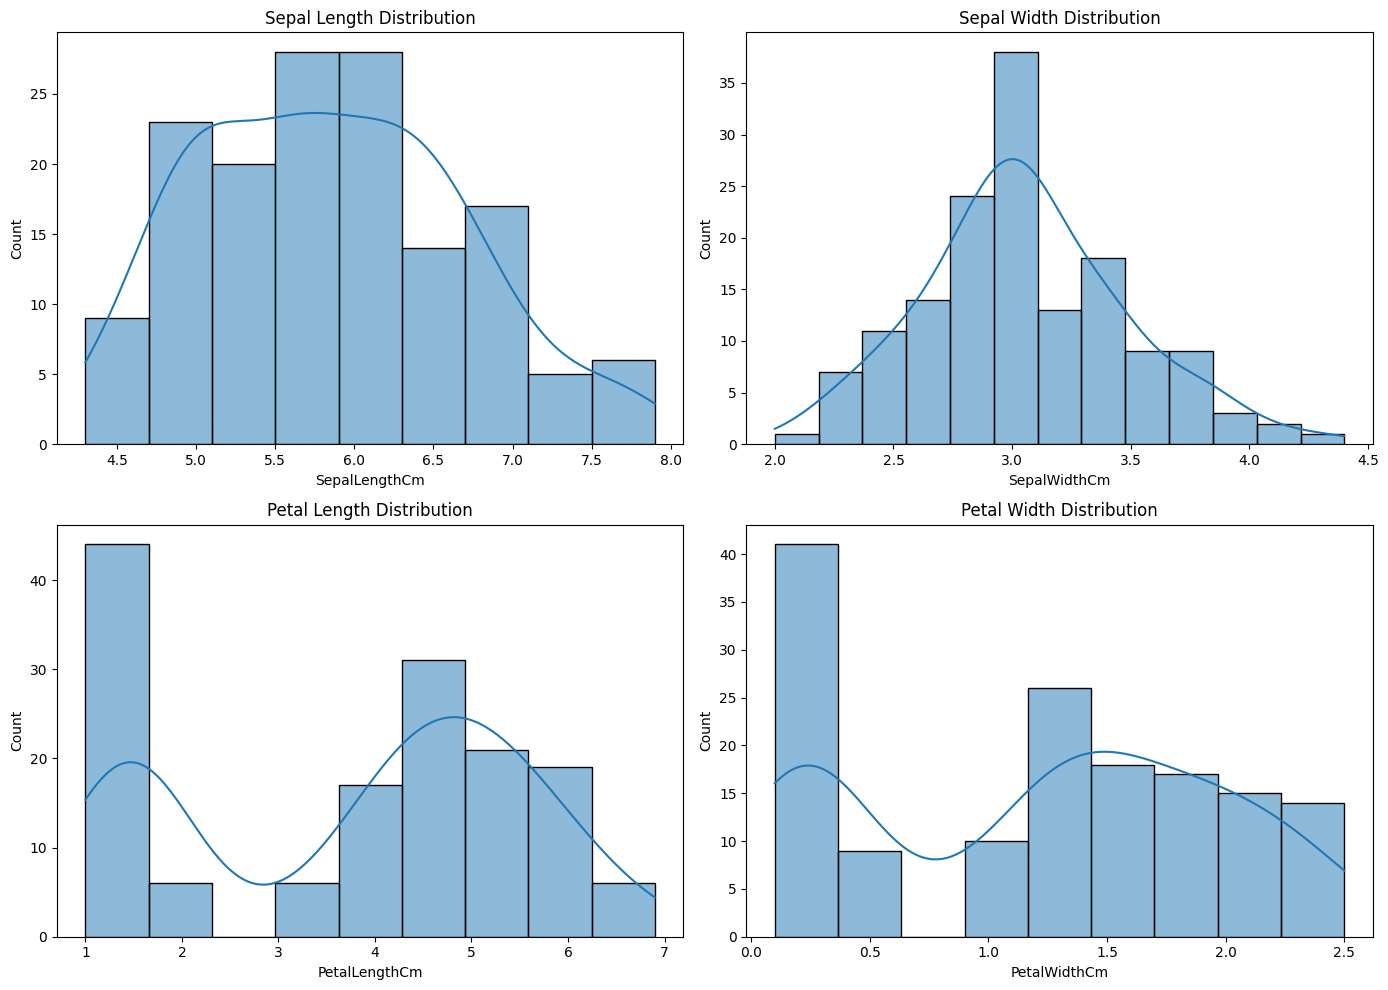

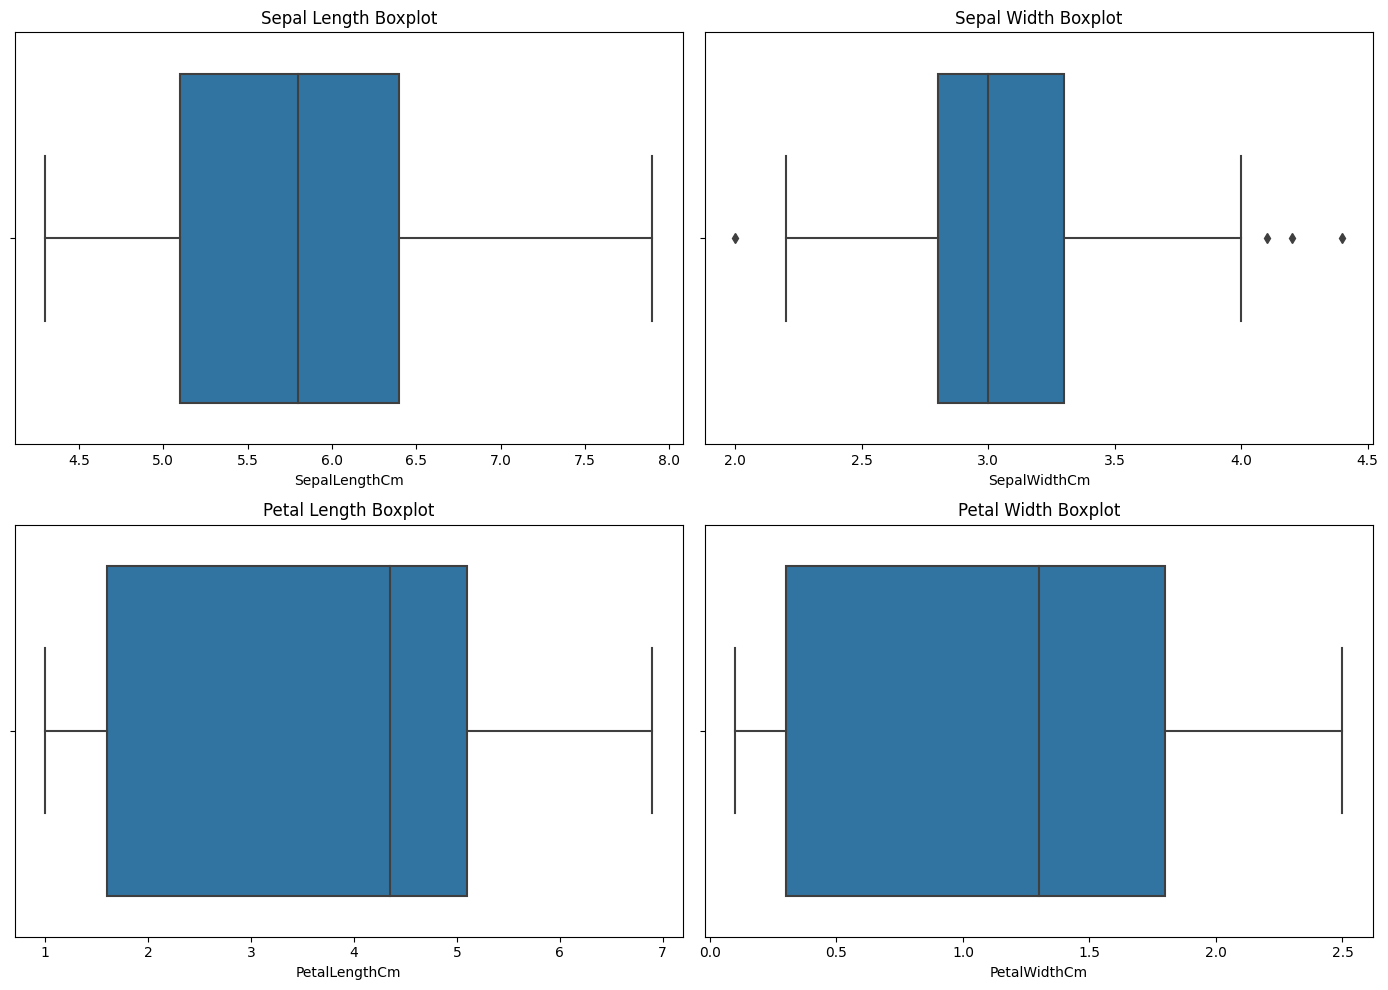

In [9]:
# Histograms and KDE plots for distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['SepalLengthCm'], kde=True, ax=axes[0, 0]).set_title('Sepal Length Distribution')
sns.histplot(df['SepalWidthCm'], kde=True, ax=axes[0, 1]).set_title('Sepal Width Distribution')
sns.histplot(df['PetalLengthCm'], kde=True, ax=axes[1, 0]).set_title('Petal Length Distribution')
sns.histplot(df['PetalWidthCm'], kde=True, ax=axes[1, 1]).set_title('Petal Width Distribution')

plt.tight_layout()
plt.show()

# Box plots for outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(data=df, x='SepalLengthCm', ax=axes[0, 0]).set_title('Sepal Length Boxplot')
sns.boxplot(data=df, x='SepalWidthCm', ax=axes[0, 1]).set_title('Sepal Width Boxplot')
sns.boxplot(data=df, x='PetalLengthCm', ax=axes[1, 0]).set_title('Petal Length Boxplot')
sns.boxplot(data=df, x='PetalWidthCm', ax=axes[1, 1]).set_title('Petal Width Boxplot')

plt.tight_layout()
plt.show()


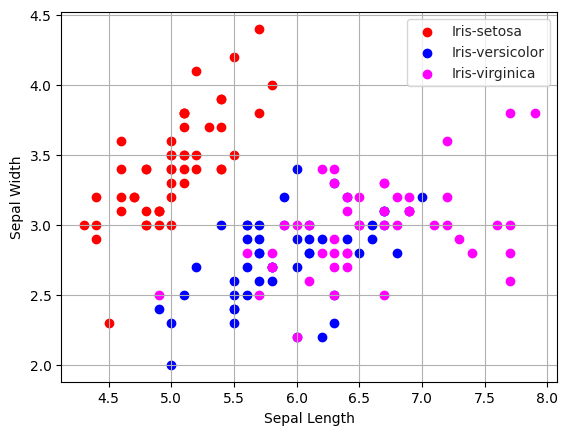

In [10]:
colors = ['red','blue','magenta']
Species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

for i in range(3):
    j = df[df['Species'] ==  Species[i]]
    plt.scatter(j['SepalLengthCm'],j['SepalWidthCm'],c = colors[i],label = Species[i])
sns.set_style('ticks')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.grid()
plt.show()

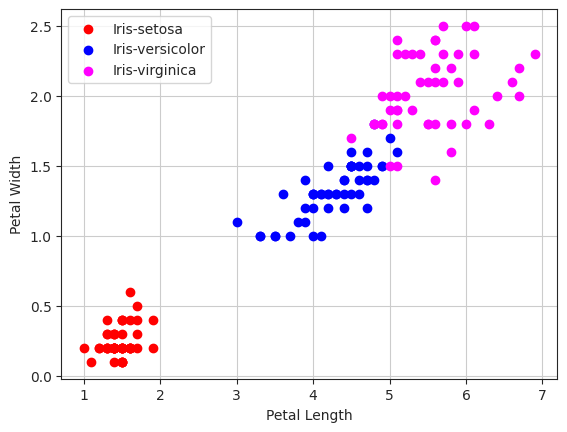

In [11]:
colors = ['red','blue','magenta']
Species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

for i in range(3):
    j = df[df['Species'] ==  Species[i]]
    plt.scatter(j['PetalLengthCm'],j['PetalWidthCm'],c = colors[i],label = Species[i])
sns.set_style('ticks')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.grid()
plt.show()

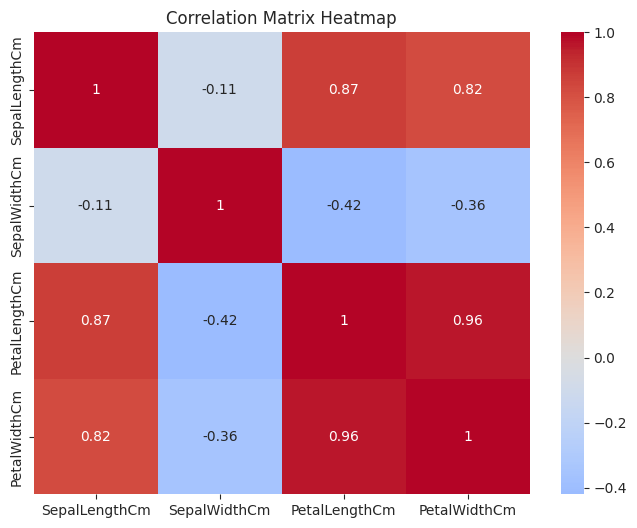


Species Distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [12]:
# Heatmap for correlation matrix
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0).set_title('Correlation Matrix Heatmap')
plt.show()

# Species Distribution
species_distribution = df['Species'].value_counts()
print("\nSpecies Distribution:")
print(species_distribution)

In [13]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
# Inference Based on Label Encoding
''' 0 - Iris-setosa        50
    1 - Iris-versicolor    50
    2 - Iris-virginica     50'''
df['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [15]:
# Model Training and Testing 

from sklearn.model_selection import train_test_split
X = df.drop(columns= ['Species'])
y = df['Species']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size= 0.7, random_state=21)

### Logistic Regression Model

In [16]:
# Using Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [17]:
# Model Prediction Score on test dataset
print(f'The Model Accuracy score is ',model.score(X_test,y_test)*100)

The Model Accuracy score is  93.33333333333333


### KNN Model

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model1 = knn.fit(X_train,y_train)
# Model Prediction Score on test dataset
print(f'The Model Accuracy score is ',model1.score(X_test,y_test)*100)

The Model Accuracy score is  93.33333333333333


### Decision Tree Model

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model2 = dt.fit(X_train,y_train)
# Model Prediction Score on test dataset
print(f'The Model Accuracy score is ',model2.score(X_test,y_test)*100)

The Model Accuracy score is  93.33333333333333


### Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model3 = rf.fit(X_train,y_train)
# Model Prediction Score on test dataset
print(f'The Model Accuracy score is ',model3.score(X_test,y_test)*100)

The Model Accuracy score is  93.33333333333333


In [21]:
y_pred = model.predict(X_test)

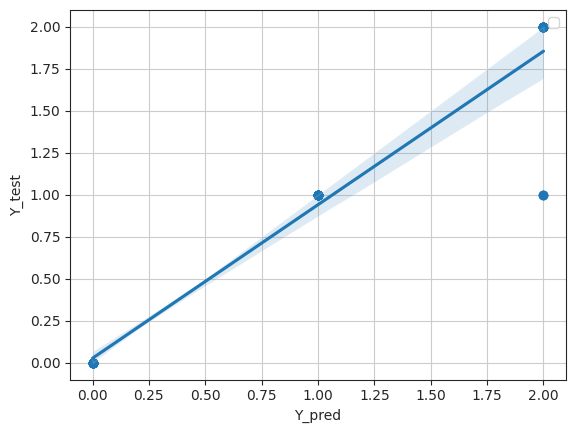

In [22]:
sns.regplot(x = y_pred, y = y_test)
plt.xlabel('Y_pred')
plt.ylabel('Y_test')
plt.grid()
plt.legend()
plt.show()